In [2]:
import numpy as np 
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [43]:
v_t = np.random.normal(loc=0.0, scale=1.0, size=None)


In [44]:
white_noise = []

In [45]:
for i in range(300):
    v_t = np.random.normal(loc=0.0, scale=1.0, size=None)
    white_noise.append(v_t)


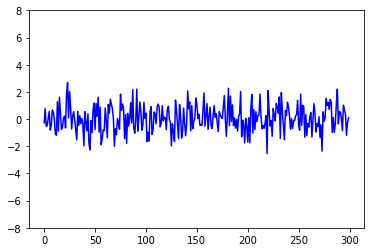

In [47]:
plt.plot(white_noise,'blue')
plt.ylim((-8,8))
plt.show()

In [52]:
# ar1 
x=[0]
for i in range(300):
    x_t_1 = 0.7*x[i]+white_noise[i]
    x.append(x_t_1)

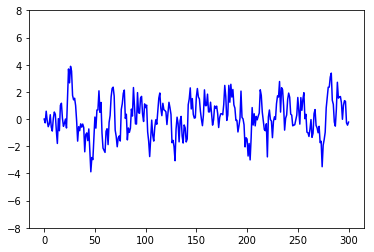

In [53]:
plt.plot(x,'blue')
plt.ylim((-8,8))
plt.show()

In [180]:
#garch error
epsilon = [0]
for i in range(300):
    a =  math.sqrt(1+0.8*(epsilon[i]**2))
    epsilon_t = white_noise[i]*a
    epsilon.append(epsilon_t)
#epsilon

NameError: name 'white_noise' is not defined

In [86]:
#取前三百個
eps = epsilon[0:300]

In [89]:
#ar1 fit arch1
x=[0]
for i in range(300):
    x_t_1 = 0.9*x[i]+eps[i]
    x.append(x_t_1)

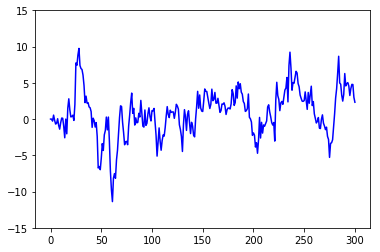

In [93]:
plt.plot(x,'blue')
plt.ylim((-15,15))
plt.show()

In [128]:
trend=[]
for i in range(700):
    t_trend = i
    trend.append(t_trend)
trend = np.array(trend)

In [62]:
len(trend)

300

In [143]:
#ar1 + arch1 + trend
x=[0]
for i in range(300):
    x_t_1 = 0.9*x[i]+eps[i]+0.02*trend[i]
    x.append(x_t_1)

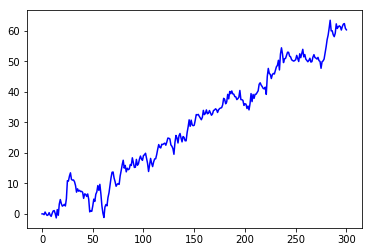

In [144]:
plt.plot(x,'blue')
#plt.ylim((-10,80))
plt.show()

In [149]:
# arima 資料長度為先改為500筆，前20比捕0，最後再取最後300筆感覺比較好

#step1 先製造出eplison
x=[]
for i in range(20):
    x.append(0)
for i in range(480):
    x.append(np.random.normal(loc=0.0, scale=1.0, size=None))


# arima(1,1) fit Garch(1,1)

## epls = v_t*sqrt(h_t)

In [124]:
# a_{0}=0.3,epls_{t-1}=0,h_{t-1}=0
epls= [0]###garch(1,1會有兩個起始點)
h_t = [0]

a_0 = 0.3
a_1 = 0.2
b_1 = 0.3
for i in range(500):
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i]
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [179]:
#h_t

In [126]:
epls[1]

0.4096068129616711

In [131]:
#arima(1,1) fit Garch(1,1)
ma_lag1=0.225
ar_lag1=0.8
m=[0]

for i in range(1,500):
    x_t_1 =0.2+ ar_lag1*m[i-1] + epls[i] + ma_lag1*epls[i-1]+0.01*trend[i]
    m.append(x_t_1)

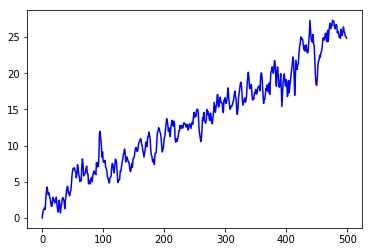

In [132]:
plt.plot(m,'blue')
#plt.ylim((-10,80))
plt.show()#取後三百比資料

In [135]:
m_new=m[-300:]
len(m_new)

300

In [136]:
df = pd.DataFrame(data=m_new)

In [144]:
df.to_csv ('arima11garch11.csv')

In [ ]:
m_new=m[-300:]
len(m_new)
df = pd.DataFrame(data=m_new)
df.to_csv ('arima11garch11.csv')

# arima(1,1) fit Tarch(1,1)
ma_lag1=0.225,
ar_lag1=0.6,
a_0 = 0.010,
a_1 = -0.022,
b_1 = 0.933,
a_2 = 0.154,

In [178]:
####tarch修正
# a_{0}=0.3,epls_{t-1}=0,h_{t-1}=0
epls= [0]###garch(1,1會有兩個起始點)
h_t = [0]

a_0 = 0.010
a_1 = -0.022
b_1 = 0.933
a_2 = 0.154
for i in range(500):
    if epls[i-1]<0:
        d_t=1.000
    else:
        d_t=0.000
    #print(d_t)
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i] + a_2*d_t*(epls[i]**2)#####按照課本寫的話這條式子會出現ht<0造成程式出錯？
    #ht = abs(ht)#必須加絕對值才行
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [149]:
#arima(1,1) fit Garch(1,1)
ma_lag1=0.225
ar_lag1=0.6
m=[0]

for i in range(1,500):
    x_t_1 =0.2+ ar_lag1*m[i-1] + epls[i] + ma_lag1*epls[i-1]#+0.000002*trend[i]
    m.append(x_t_1)


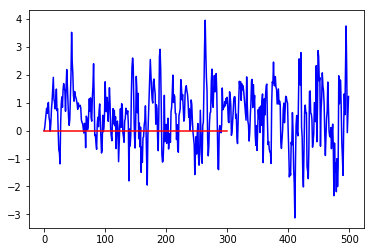

In [150]:
plt.plot(m,'blue')
plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [151]:
m_new=m[-300:]
len(m_new)
df = pd.DataFrame(data=m_new)
df.to_csv ('arima(1,1) fit Tarch(1,1).csv')

# ar(2)+IGARCH 參考課本161

In [158]:
# a_{0}=0.3,epls_{t-1}=0,h_{t-1}=0
epls= [0,0]###garch(1,1會有兩個起始點)
h_t = [0,0]

a_0 = 0.008
a_1 = 0.09
b_1 = 0.91
for i in range(520):
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i] 
    #ht = abs(ht)#必須加絕對值才行
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [159]:
#h_t
ar_lag1=-0.062
m=[0,0]
ar_lag2=-0.045
for i in range(2,520):
    x_t_1 =0.061+ ar_lag1*m[i-1] + ar_lag2*m[i-2] + epls[i] 
    m.append(x_t_1)


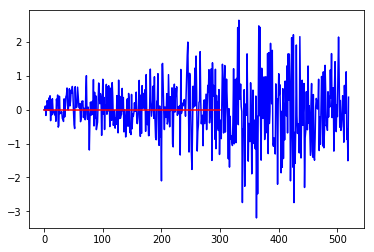

In [160]:
plt.plot(m,'blue')
plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [161]:
m_new=m[-300:]
len(m_new)
df = pd.DataFrame(data=m_new)
df.to_csv ('ar(2)+IGARCH.csv')

# ar1+ arch1 p178

In [165]:
# a_{0}=0.3,epls_{t-1}=0,h_{t-1}=0
epls= [0]###garch(1,1會有兩個起始點)
h_t = [0]

a_0 = 1.19
a_1 = 0.663
for i in range(502):
    ht = a_0 + a_1* (epls[i]**2)  
    #ht = abs(ht)#必須加絕對值才行
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [166]:
ar_lag1=0.886
m=[0]
for i in range(1,501):
    x_t_1 = ar_lag1*m[i-1]  + epls[i] 
    m.append(x_t_1)


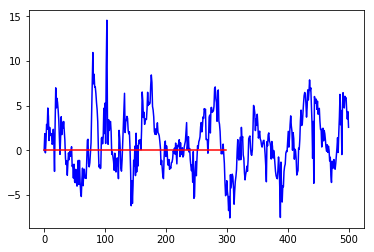

In [167]:
plt.plot(m,'blue')
plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [168]:
m_new=m[-300:]
len(m_new)
df = pd.DataFrame(data=m_new)
df.to_csv ('ar1+ arch1.csv')

# arima[2,(1,7)]+garch1,1

In [169]:
epls= [0,0,0,0,0,0,0]###garch(1,1會有兩個起始點)
h_t = [0,0,0,0,0,0,0]

a_0 = 0.017
a_1 = 0.233
b_1 = 0.697
for i in range(500):
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i]
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [170]:
ma_lag1=0.686
ar_lag1=0.514
ar_lag2=0.304
ma_lag7=-0.13
m=[0,0,0,0,0,0,0]

for i in range(1,500):
    x_t_1 =0.192+ ar_lag1*m[i-1] + epls[i] + ma_lag1*epls[i-1]+ma_lag7*epls[i-7]
    m.append(x_t_1)

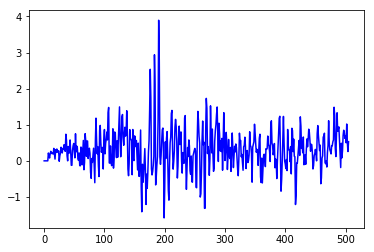

In [172]:
plt.plot(m,'blue')
#plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [173]:
m_new=m[-300:]
len(m_new)
df = pd.DataFrame(data=m_new)
df.to_csv ('arima[2,(1,7)]+garch1,1.csv')

# ma(1,3)+garch(1,1)

In [174]:
epls= [0,0,0]###garch(1,1會有兩個起始點)
h_t = [0,0,0]

a_0 = 0.402
a_1 = 0.097
b_1 = 0.881
for i in range(500):
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i]
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [175]:
ma_lag1=0.177
ma_lag3=0.095
m=[0,0,0]

for i in range(1,500):
    x_t_1 =0.127 + epls[i] + ma_lag1*epls[i-1]+ma_lag3*epls[i-3]
    m.append(x_t_1)

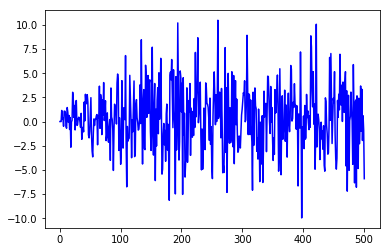

In [176]:
plt.plot(m,'blue')
#plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [177]:
m_new=m[-300:]
len(m_new)
df = pd.DataFrame(data=m_new)
df.to_csv ('ma(1,3)+garch(1,1).csv')